# Machine Learning Trading Bot

In this Challenge, you’ll assume the role of a financial advisor at one of the top five financial advisory firms in the world. Your firm constantly competes with the other major firms to manage and automatically trade assets in a highly dynamic environment. In recent years, your firm has heavily profited by using computer algorithms that can buy and sell faster than human traders.

The speed of these transactions gave your firm a competitive advantage early on. But, people still need to specifically program these systems, which limits their ability to adapt to new data. You’re thus planning to improve the existing algorithmic trading systems and maintain the firm’s competitive advantage in the market. To do so, you’ll enhance the existing trading signals with machine learning algorithms that can adapt to new data.

## Instructions:

Use the starter code file to complete the steps that the instructions outline. The steps for this Challenge are divided into the following sections:

* Establish a Baseline Performance

* Tune the Baseline Trading Algorithm

* Evaluate a New Machine Learning Classifier

* Create an Evaluation Report

#### Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four. 

1. Import the OHLCV dataset into a Pandas DataFrame.

2. Generate trading signals using short- and long-window SMA values. 

3. Split the data into training and testing datasets.

4. Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

5. Review the classification report associated with the `SVC` model predictions. 

6. Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

7. Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

8. Write your conclusions about the performance of the baseline trading algorithm in the `README.md` file that’s associated with your GitHub repository. Support your findings by using the PNG image that you saved in the previous step.

#### Tune the Baseline Trading Algorithm

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. (You’ll choose the best by comparing the cumulative products of the strategy returns.) To do so, complete the following steps:

1. Tune the training algorithm by adjusting the size of the training dataset. To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. Answer the following question: What impact resulted from increasing or decreasing the training window?

> **Hint** To adjust the size of the training dataset, you can use a different `DateOffset` value&mdash;for example, six months. Be aware that changing the size of the training dataset also affects the size of the testing dataset.

2. Tune the trading algorithm by adjusting the SMA input features. Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

3. Choose the set of parameters that best improved the trading algorithm returns. Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

#### Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. To do so, complete the following steps:

1. Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

2. Using the original training data as the baseline model, fit another model with the new classifier.

3. Backtest the new model to evaluate its performance. Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file. Answer the following questions: Did this new model perform better or worse than the provided baseline model? Did this new model perform better or worse than your tuned trading algorithm?

#### Create an Evaluation Report

In the previous sections, you updated your `README.md` file with your conclusions. To accomplish this section, you need to add a summary evaluation report at the end of the `README.md` file. For this report, express your final conclusions and analysis. Support your findings by using the PNG images that you created.


In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

---

## Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four. 


### Step 1: mport the OHLCV dataset into a Pandas DataFrame.

In [2]:
# Import the OHLCV dataset into a Pandas Dataframe
ohlcv_df = pd.read_csv(
    Path("./Resources/emerging_markets_ohlcv.csv"), 
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
ohlcv_df.head()

C:\Users\PC2\AppData\Local\Temp\ipykernel_2836\566489611.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  ohlcv_df = pd.read_csv(
C:\Users\PC2\AppData\Local\Temp\ipykernel_2836\566489611.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ohlcv_df = pd.read_csv(


,open,high,low,close,volume
date,,,,,
2015-01-21 09:30:00,23.83,23.83,23.83,23.83,100
2015-01-21 11:00:00,23.98,23.98,23.98,23.98,100
2015-01-22 15:00:00,24.42,24.42,24.42,24.42,100
2015-01-22 15:15:00,24.42,24.44,24.42,24.44,200
2015-01-22 15:30:00,24.46,24.46,24.46,24.46,200


In [3]:
# Filter the date index and close columns
signals_df = ohlcv_df.loc[:, ["close"]]

# Use the pct_change function to generate  returns from close prices
signals_df["Actual Returns"] = signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns
date,,
2015-01-21 11:00:00,23.98,0.006295
2015-01-22 15:00:00,24.42,0.018349
2015-01-22 15:15:00,24.44,0.000819
2015-01-22 15:30:00,24.46,0.000818
2015-01-26 12:30:00,24.33,-0.005315


,close,Actual Returns
date,,
2021-01-22 09:30:00,33.27,-0.006866
2021-01-22 11:30:00,33.35,0.002405
2021-01-22 13:45:00,33.42,0.002099
2021-01-22 14:30:00,33.47,0.001496
2021-01-22 15:45:00,33.44,-0.000896


## Step 2: Generate trading signals using short- and long-window SMA values. 

In [4]:
# Set the short window and long window
short_window = 4
long_window = 100

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
signals_df['SMA_Fast'] = signals_df['close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['close'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463


,close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495


In [5]:
# Initialize the new Signal column
signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214,1.0
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308,1.0
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360,1.0
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411,1.0
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463,1.0


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215,-1.0
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445,1.0
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745,1.0
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085,1.0
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495,-1.0


In [6]:
signals_df['Signal'].value_counts()

Signal
 1.0    2368
-1.0    1855
Name: count, dtype: int64

In [7]:
# Calculate the strategy returns and add them to the signals_df DataFrame
signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
date,,,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214,1.0,NaN
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308,1.0,0.000000
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360,1.0,0.000803
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411,1.0,0.000401
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463,1.0,0.001202


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
date,,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215,-1.0,-0.006866
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445,1.0,-0.002405
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745,1.0,0.002099
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085,1.0,0.001496
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495,-1.0,-0.000896


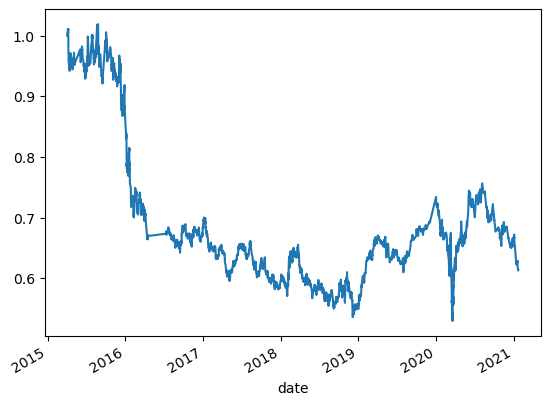

In [8]:
# Your plotting code here
plt_0 = (1 + signals_df["Strategy Returns"]).cumprod()

# Display the plot
plt_0.plot()


# Save the plot as a PNG file
plt.savefig('sma_model.png')
plt.show()

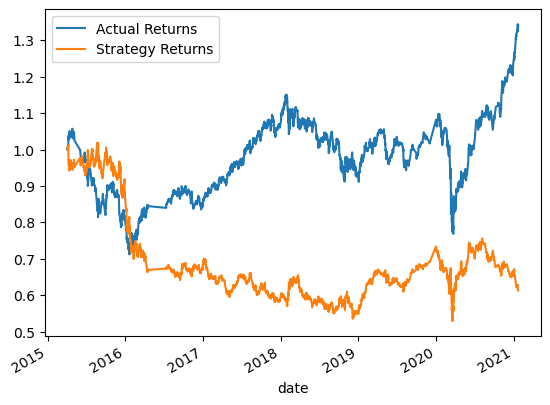

In [9]:
# Your plotting code here
plt_4 = (1 + signals_df[["Actual Returns", "Strategy Returns"]]).cumprod()

# Display the plot
plt_4.plot()


# Save the plot as a PNG file
plt.savefig('signals_model.png')
plt.show()

### Step 3: Split the data into training and testing datasets.

In [10]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
X.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [11]:
# Create the target set selecting the Signal column and assiging it to y
y = signals_df['Signal']

# Review the value counts
y.value_counts()

Signal
 1.0    2368
-1.0    1855
Name: count, dtype: int64

In [12]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2015-04-02 15:00:00


In [13]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2015-07-02 15:00:00


In [14]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [15]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [16]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Step 4: Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

In [17]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Step 5: Review the classification report associated with the `SVC` model predictions. 

In [18]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
svm_testing_report

'              precision    recall  f1-score   support\n\n        -1.0       0.43      0.04      0.07      1804\n         1.0       0.56      0.96      0.71      2288\n\n    accuracy                           0.55      4092\n   macro avg       0.49      0.50      0.39      4092\nweighted avg       0.50      0.55      0.43      4092\n'

### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [19]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = signals_df["Actual Returns"]

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = predictions_df['Actual Returns'] * predictions_df['Predicted']

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
date,,,
2015-07-06 10:00:00,1.0,-0.025715,-0.025715
2015-07-06 10:45:00,1.0,0.007237,0.007237
2015-07-06 14:15:00,1.0,-0.009721,-0.009721
2015-07-06 14:30:00,1.0,-0.003841,-0.003841
2015-07-07 11:30:00,1.0,-0.018423,-0.018423


,Predicted,Actual Returns,Strategy Returns
date,,,
2021-01-22 09:30:00,1.0,-0.006866,-0.006866
2021-01-22 11:30:00,1.0,0.002405,0.002405
2021-01-22 13:45:00,1.0,0.002099,0.002099
2021-01-22 14:30:00,1.0,0.001496,0.001496
2021-01-22 15:45:00,1.0,-0.000896,-0.000896


### Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

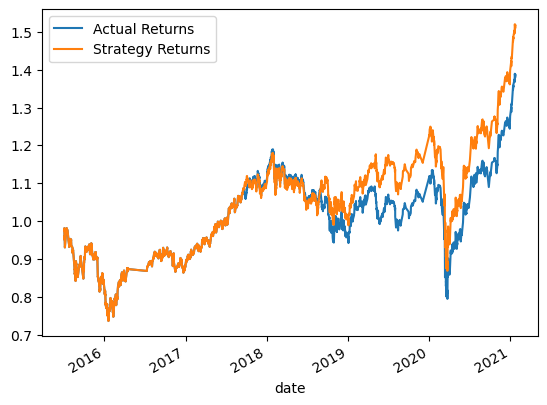

In [20]:
# Your plotting code here
plt_2 = (1 + predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod()

# Display the plot
plt_2.plot()


# Save the plot as a PNG file
plt.savefig('predictions_svm_model.png')
plt.show()

---

## Tune the Baseline Trading Algorithm

## Step 6: Use an Alternative ML Model and Evaluate Strategy Returns

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. You’ll choose the best by comparing the cumulative products of the strategy returns.

### Step 1: Tune the training algorithm by adjusting the size of the training dataset. 

To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

Answer the following question: What impact resulted from increasing or decreasing the training window?

In [21]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2015-04-02 15:00:00


In [22]:
# Select the ending period for the training data with an offset of 6 months
training_end = X.index.min() + DateOffset(months=6)

# Display the training end date
print(training_end)

2015-10-02 15:00:00


In [23]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [24]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [25]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_adj_1_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_adj_1_pred[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [27]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_adj_1_testing_report = classification_report(y_test, svm_adj_1_pred)

# Print the classification report
svm_adj_1_testing_report

'              precision    recall  f1-score   support\n\n        -1.0       0.44      0.02      0.04      1732\n         1.0       0.56      0.98      0.71      2211\n\n    accuracy                           0.56      3943\n   macro avg       0.50      0.50      0.38      3943\nweighted avg       0.51      0.56      0.42      3943\n'

In [28]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
predictions_svm_adj_1_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_svm_adj_1_df['Predicted'] = svm_adj_1_pred

# Add the actual returns to the DataFrame
predictions_svm_adj_1_df['Actual Returns'] = signals_df["Actual Returns"]

# Add the strategy returns to the DataFrame
predictions_svm_adj_1_df['Strategy Returns'] = predictions_svm_adj_1_df["Actual Returns"] * predictions_svm_adj_1_df["Predicted"]

# Review the DataFrame
display(predictions_svm_adj_1_df.head())
display(predictions_svm_adj_1_df.tail())

,Predicted,Actual Returns,Strategy Returns
date,,,
2015-10-05 09:45:00,1.0,0.013532,0.013532
2015-10-05 11:30:00,1.0,0.002302,0.002302
2015-10-05 13:15:00,1.0,-0.000919,-0.000919
2015-10-05 14:30:00,1.0,0.000920,0.000920
2015-10-05 14:45:00,1.0,0.002756,0.002756


,Predicted,Actual Returns,Strategy Returns
date,,,
2021-01-22 09:30:00,1.0,-0.006866,-0.006866
2021-01-22 11:30:00,1.0,0.002405,0.002405
2021-01-22 13:45:00,1.0,0.002099,0.002099
2021-01-22 14:30:00,1.0,0.001496,0.001496
2021-01-22 15:45:00,1.0,-0.000896,-0.000896


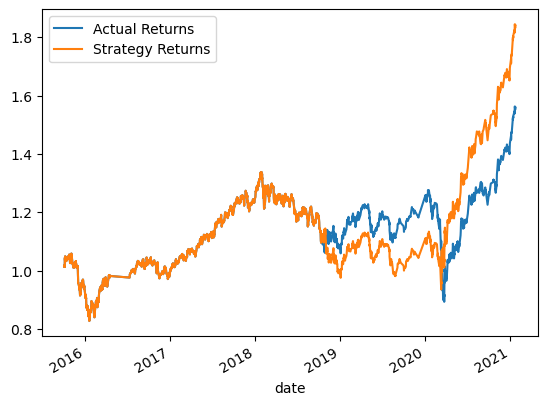

In [29]:
# Your plotting code here
plt_3 = (1 + predictions_svm_adj_1_df[["Actual Returns", "Strategy Returns"]]).cumprod()

# Display the plot
plt_3.plot()


# Save the plot as a PNG file
plt.savefig('predictions_svm_adj_1_model.png')
plt.show()

### Step 2: Tune the trading algorithm by adjusting the SMA input features. 

Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

In [30]:
# Set the short window and long window
short_window = 25
long_window = 200

# Create a predictions DataFrame
predictions_svm_adj_2_df = pd.DataFrame(index=X_test.index)

# Generate the fast and slow simple moving averages (25 and 100 days, respectively)
predictions_svm_adj_2_df['SMA_Fast'] = signals_df['close'].rolling(window=short_window).mean()
predictions_svm_adj_2_df['SMA_Slow'] = signals_df['close'].rolling(window=long_window).mean()

predictions_svm_adj_2_df = predictions_svm_adj_2_df.dropna()

# Review the DataFrame
display(predictions_svm_adj_2_df.head())
display(predictions_svm_adj_2_df.tail())

,SMA_Fast,SMA_Slow
date,,
2015-10-05 09:45:00,21.38636,22.604495
2015-10-05 11:30:00,21.40596,22.589395
2015-10-05 13:15:00,21.42516,22.574145
2015-10-05 14:30:00,21.44756,22.558995
2015-10-05 14:45:00,21.47036,22.545595


,SMA_Fast,SMA_Slow
date,,
2021-01-22 09:30:00,32.1516,29.05610
2021-01-22 11:30:00,32.2676,29.08625
2021-01-22 13:45:00,32.3860,29.11665
2021-01-22 14:30:00,32.4928,29.14690
2021-01-22 15:45:00,32.5760,29.17835


In [31]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = predictions_svm_adj_2_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
X.head()

,SMA_Fast,SMA_Slow
date,,
2015-10-05 11:30:00,21.38636,22.604495
2015-10-05 13:15:00,21.40596,22.589395
2015-10-05 14:30:00,21.42516,22.574145
2015-10-05 14:45:00,21.44756,22.558995
2015-10-05 15:45:00,21.47036,22.545595


In [32]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2015-10-05 11:30:00


In [33]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=6)

# Display the training end date
print(training_end)

2016-04-05 11:30:00


In [34]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-10-05 11:30:00,21.38636,22.604495
2015-10-05 13:15:00,21.40596,22.589395
2015-10-05 14:30:00,21.42516,22.574145
2015-10-05 14:45:00,21.44756,22.558995
2015-10-05 15:45:00,21.47036,22.545595


In [35]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_test.head()

,SMA_Fast,SMA_Slow
date,,
2016-04-06 12:15:00,20.55396,19.37302
2016-04-13 15:00:00,20.55036,19.38562
2016-04-13 15:45:00,20.58196,19.40202
2016-04-14 09:45:00,20.60636,19.41777
2016-04-14 10:00:00,20.62236,19.43297


In [36]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred_adj_2 = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred_adj_2[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_adj_2_testing_report = classification_report(y_test, svm_pred_adj_2)

# Print the classification report
svm_adj_2_testing_report

'              precision    recall  f1-score   support\n\n        -1.0       0.40      0.09      0.14      1497\n         1.0       0.56      0.90      0.69      1929\n\n    accuracy                           0.54      3426\n   macro avg       0.48      0.49      0.42      3426\nweighted avg       0.49      0.54      0.45      3426\n'

In [39]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
predictions_svm_adj_2_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_svm_adj_2_df['Predicted'] = svm_pred_adj_2

# Add the actual returns to the DataFrame
predictions_svm_adj_2_df['Actual Returns'] = signals_df["Actual Returns"]

# Add the strategy returns to the DataFrame
predictions_svm_adj_2_df['Strategy Returns'] = predictions_svm_adj_2_df["Actual Returns"] * predictions_svm_adj_2_df["Predicted"]

# Review the DataFrame
display(predictions_svm_adj_2_df.head())
display(predictions_svm_adj_2_df.tail())

,Predicted,Actual Returns,Strategy Returns
date,,,
2016-04-06 12:15:00,1.0,-0.018363,-0.018363
2016-04-13 15:00:00,1.0,0.041955,0.041955
2016-04-13 15:45:00,1.0,-0.000474,-0.000474
2016-04-14 09:45:00,1.0,-0.006161,-0.006161
2016-04-14 10:00:00,1.0,-0.000477,-0.000477


,Predicted,Actual Returns,Strategy Returns
date,,,
2021-01-22 09:30:00,1.0,-0.006866,-0.006866
2021-01-22 11:30:00,1.0,0.002405,0.002405
2021-01-22 13:45:00,1.0,0.002099,0.002099
2021-01-22 14:30:00,1.0,0.001496,0.001496
2021-01-22 15:45:00,1.0,-0.000896,-0.000896


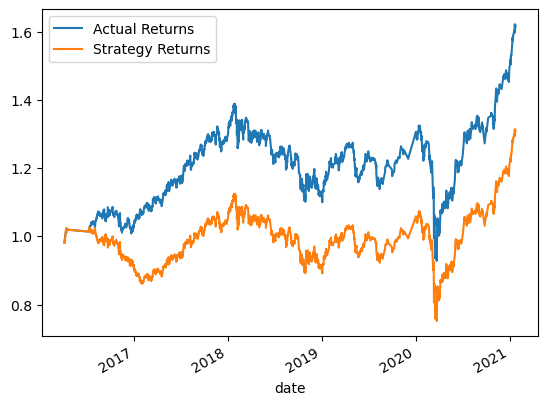

In [40]:
# Your plotting code here
plt_4 = (1 + predictions_svm_adj_2_df[["Actual Returns", "Strategy Returns"]]).cumprod()

# Display the plot
plt_4.plot()


# Save the plot as a PNG file
plt.savefig('predictions_svm_adj_2_model.png')
plt.show()


### Step 3: Choose the set of parameters that best improved the trading algorithm returns. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

---

## Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. 

### Step 1:  Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

In [41]:
# Set the short window and long window
short_window = 4
long_window = 100

lr_model_df = pd.DataFrame(index=X_test.index)

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
lr_model_df['SMA_Fast'] = signals_df['close'].rolling(window=short_window).mean()
lr_model_df['SMA_Slow'] = signals_df['close'].rolling(window=long_window).mean()

lr_model_df = lr_model_df.dropna()

# Review the DataFrame
display(lr_model_df.head())
display(lr_model_df.tail())

,SMA_Fast,SMA_Slow
date,,
2016-04-06 12:15:00,20.44475,20.14899
2016-04-13 15:00:00,20.64475,20.16849
2016-04-13 15:45:00,20.77725,20.18809
2016-04-14 09:45:00,20.86000,20.20629
2016-04-14 10:00:00,21.03500,20.22429


,SMA_Fast,SMA_Slow
date,,
2021-01-22 09:30:00,33.2025,30.40215
2021-01-22 11:30:00,33.2725,30.44445
2021-01-22 13:45:00,33.3850,30.48745
2021-01-22 14:30:00,33.3775,30.53085
2021-01-22 15:45:00,33.4200,30.57495


In [42]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = lr_model_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
X.head()

,SMA_Fast,SMA_Slow
date,,
2016-04-13 15:00:00,20.44475,20.14899
2016-04-13 15:45:00,20.64475,20.16849
2016-04-14 09:45:00,20.77725,20.18809
2016-04-14 10:00:00,20.86000,20.20629
2016-04-14 10:30:00,21.03500,20.22429


In [43]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2016-04-13 15:00:00


In [44]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2016-07-13 15:00:00


In [45]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
date,,
2016-04-13 15:00:00,20.44475,20.14899
2016-04-13 15:45:00,20.64475,20.16849
2016-04-14 09:45:00,20.77725,20.18809
2016-04-14 10:00:00,20.86000,20.20629
2016-04-14 10:30:00,21.03500,20.22429


In [46]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_test.head()

,SMA_Fast,SMA_Slow
date,,
2016-07-15 11:30:00,21.1375,20.59929
2016-07-15 11:45:00,21.2025,20.60939
2016-07-15 12:45:00,21.2150,20.61999
2016-07-15 15:45:00,21.2250,20.63269
2016-07-18 09:30:00,21.2500,20.64619


In [47]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [48]:
# From SVM, instantiate SVC classifier model instance
lr_model = LogisticRegression() 

# Fit the model to the data using the training data
lr_model = lr_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
lr_model_pred = lr_model.predict(X_test_scaled)

# Review the model's predicted values
lr_model_pred[:10]

array([ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [49]:
# Use a classification report to evaluate the model using the predictions and testing data
lr_model_testing_report = classification_report(y_test, lr_model_pred)

# Print the classification report
lr_model_testing_report

'              precision    recall  f1-score   support\n\n        -1.0       0.40      0.02      0.04      1482\n         1.0       0.56      0.98      0.71      1918\n\n    accuracy                           0.56      3400\n   macro avg       0.48      0.50      0.38      3400\nweighted avg       0.49      0.56      0.42      3400\n'

In [50]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
predictions_lr_model_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_lr_model_df['Predicted'] = lr_model_pred

# Add the actual returns to the DataFrame
predictions_lr_model_df['Actual Returns'] = signals_df["Actual Returns"]

# Add the strategy returns to the DataFrame
predictions_lr_model_df['Strategy Returns'] = predictions_lr_model_df["Actual Returns"] * predictions_lr_model_df["Predicted"]

# Review the DataFrame
display(predictions_lr_model_df.head())
display(predictions_lr_model_df.tail())

,Predicted,Actual Returns,Strategy Returns
date,,,
2016-07-15 11:30:00,1.0,0.003305,0.003305
2016-07-15 11:45:00,-1.0,-0.000471,0.000471
2016-07-15 12:45:00,-1.0,-0.000471,0.000471
2016-07-15 15:45:00,-1.0,0.002355,-0.002355
2016-07-18 09:30:00,-1.0,0.001410,-0.001410


,Predicted,Actual Returns,Strategy Returns
date,,,
2021-01-22 09:30:00,1.0,-0.006866,-0.006866
2021-01-22 11:30:00,1.0,0.002405,0.002405
2021-01-22 13:45:00,1.0,0.002099,0.002099
2021-01-22 14:30:00,1.0,0.001496,0.001496
2021-01-22 15:45:00,1.0,-0.000896,-0.000896


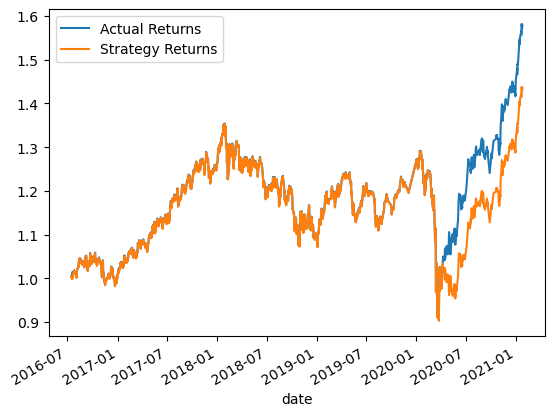

In [51]:
import matplotlib.pyplot as plt

# Your plotting code here
plt_5 = (1 + predictions_lr_model_df[["Actual Returns", "Strategy Returns"]]).cumprod()

# Display the plot
plt_5.plot()


# Save the plot as a PNG file
plt.savefig('predictions_lr_model.png')
plt.show()

### Step 2: Using the original training data as the baseline model, fit another model with the new classifier.

### Step 3: Backtest the new model to evaluate its performance. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file. 

Answer the following questions: 
Did this new model perform better or worse than the provided baseline model? 
Did this new model perform better or worse than your tuned trading algorithm?